In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv("/content/Classified Data",index_col=0)

In [7]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [8]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [11]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [12]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
pred=knn.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[133  18]
 [ 11 138]]
0.9033333333333333


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       151
           1       0.85      0.90      0.87       149

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [20]:
error_list=[]
for i in range(1,40):
   knn=KNeighborsClassifier(n_neighbors=i)
   knn.fit(X_train,y_train)
   pred_i=knn.predict(X_test)
   error_list.append(np.mean(pred_i != y_test))

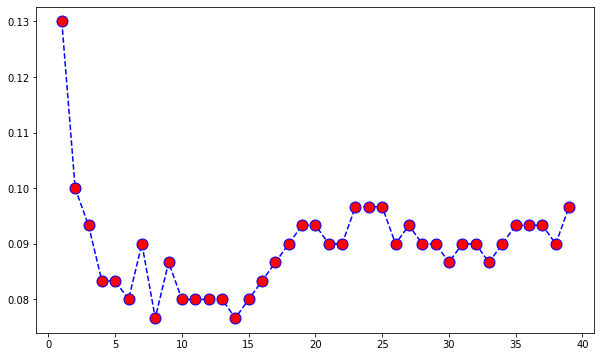

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_list,color="blue",linestyle="dashed",marker='o',markerfacecolor='red',markersize=11)
plt.title="Error rate vs K value"
plt.xlabel=("K VALUE")
plt.ylabel=( "Eror rate")

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       151
           1       0.85      0.90      0.87       149

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [23]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print("with k value=1")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

with k value=1


[[127  24]
 [ 15 134]]


              precision    recall  f1-score   support

           0       0.89      0.84      0.87       151
           1       0.85      0.90      0.87       149

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [28]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print("with k value=1")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

with k value=1


[[133  18]
 [ 11 138]]


              precision    recall  f1-score   support

           0       0.92      0.88      0.90       151
           1       0.88      0.93      0.90       149

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

0.9033333333333333


In [ ]:
|